In [21]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import tqdm as tqdm
import matplotlib.pyplot as plt

In [22]:
inputs = np.array([[0, 0, 0, 1, 0, 0, 0],
                   [0, 0, 0, 0, 1, 0, 0],
                   [0, 0, 0, 0, 0, 1, 0]], dtype='float32')
targets = np.array([[0, 0, 0, 1, 0.99, 0.99**2, 0],
                   [0, 0, 0, 0, 1, 0.99, 0],
                   [0, 0, 0, 0, 0, 1, 0]], dtype='float32')
inputs = torch.tensor(inputs)
targets = torch.tensor(targets)

In [38]:
class LinearNet(nn.Module):
    def __init__(self, in_size=7, out_size=7):
        super(LinearNet, self).__init__()
        self.layer = nn.Linear(in_size, out_size)

    def forward(self, x):
        y = self.layer(x)
        return y

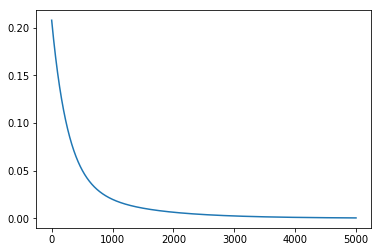

In [43]:
model = LinearNet()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2)
loss_vec = []

for t in range(5000):
    
    y_pred = model(inputs)

    # Compute and print loss
    loss = (y_pred - targets).pow(2).mul(0.5).mean()
    
    loss_vec.append(loss.item())

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
plt.plot(loss_vec)